In [1]:
import nb_setup 
import importlib
importlib.reload(nb_setup)
nb_setup.init()

Added project root to sys.path: /Users/falcon/Developments/trading
Changed current working directory to: /Users/falcon/Developments/trading
Initialized project with base directory: /Users/falcon/Developments/trading


In [2]:
from constants.coin_names import CoinNames
from settings import DATA_DIR
import pandas as pd

In [3]:
df = pd.read_csv(DATA_DIR / "all.csv", index_col=[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161336 entries, SOL to DYM
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        161336 non-null  object 
 1   end_time          161336 non-null  object 
 2   interval          161336 non-null  object 
 3   number_of_trades  161336 non-null  int64  
 4   close             161336 non-null  float64
 5   high              161336 non-null  float64
 6   low               161336 non-null  float64
 7   open              161336 non-null  float64
 8   volume            161336 non-null  float64
 9   tic               161336 non-null  int64  
 10  toc               161336 non-null  int64  
 11  pct_change        2880 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 16.0+ MB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161336 entries, SOL to DYM
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   start_time              161336 non-null  object 
 1   end_time                161336 non-null  object 
 2   interval                161336 non-null  object 
 3   number_of_trades        161336 non-null  int64  
 4   close                   161336 non-null  float64
 5   high                    161336 non-null  float64
 6   low                     161336 non-null  float64
 7   open                    161336 non-null  float64
 8   volume                  161336 non-null  float64
 9   tic                     161336 non-null  int64  
 10  toc                     161336 non-null  int64  
 11  pct_change              161280 non-null  float64
 12  accumulated_pct_change  161280 non-null  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 17.2+ MB


In [6]:
df.head()

,start_time,end_time,interval,number_of_trades,close,high,low,open,volume,tic,toc,pct_change,accumulated_pct_change
symbol,,,,,,,,,,,,,
SOL,2024-02-08-00:00:00,2024-02-08-00:14:59,15m,17,101.41,101.42,100.97,101.19,63.59,1707350400000,1707351299999,NaN,NaN
SOL,2024-02-08-00:15:00,2024-02-08-00:29:59,15m,22,102.03,102.03,101.40,101.52,33.99,1707351300000,1707352199999,0.611380,0.611380
SOL,2024-02-08-00:30:00,2024-02-08-00:44:59,15m,17,101.78,102.19,101.78,102.19,683.71,1707352200000,1707353099999,-0.245026,0.364856
SOL,2024-02-08-00:45:00,2024-02-08-00:59:59,15m,13,101.99,101.99,101.53,101.79,30.61,1707353100000,1707353999999,0.206327,0.571936
SOL,2024-02-08-01:00:00,2024-02-08-01:14:59,15m,22,101.29,102.00,101.25,102.00,139.06,1707354000000,1707354899999,-0.686342,-0.118332


/var/folders/6w/7b7qhtd56jz545z6zwv6zc800000gn/T/ipykernel_7675/2720924124.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


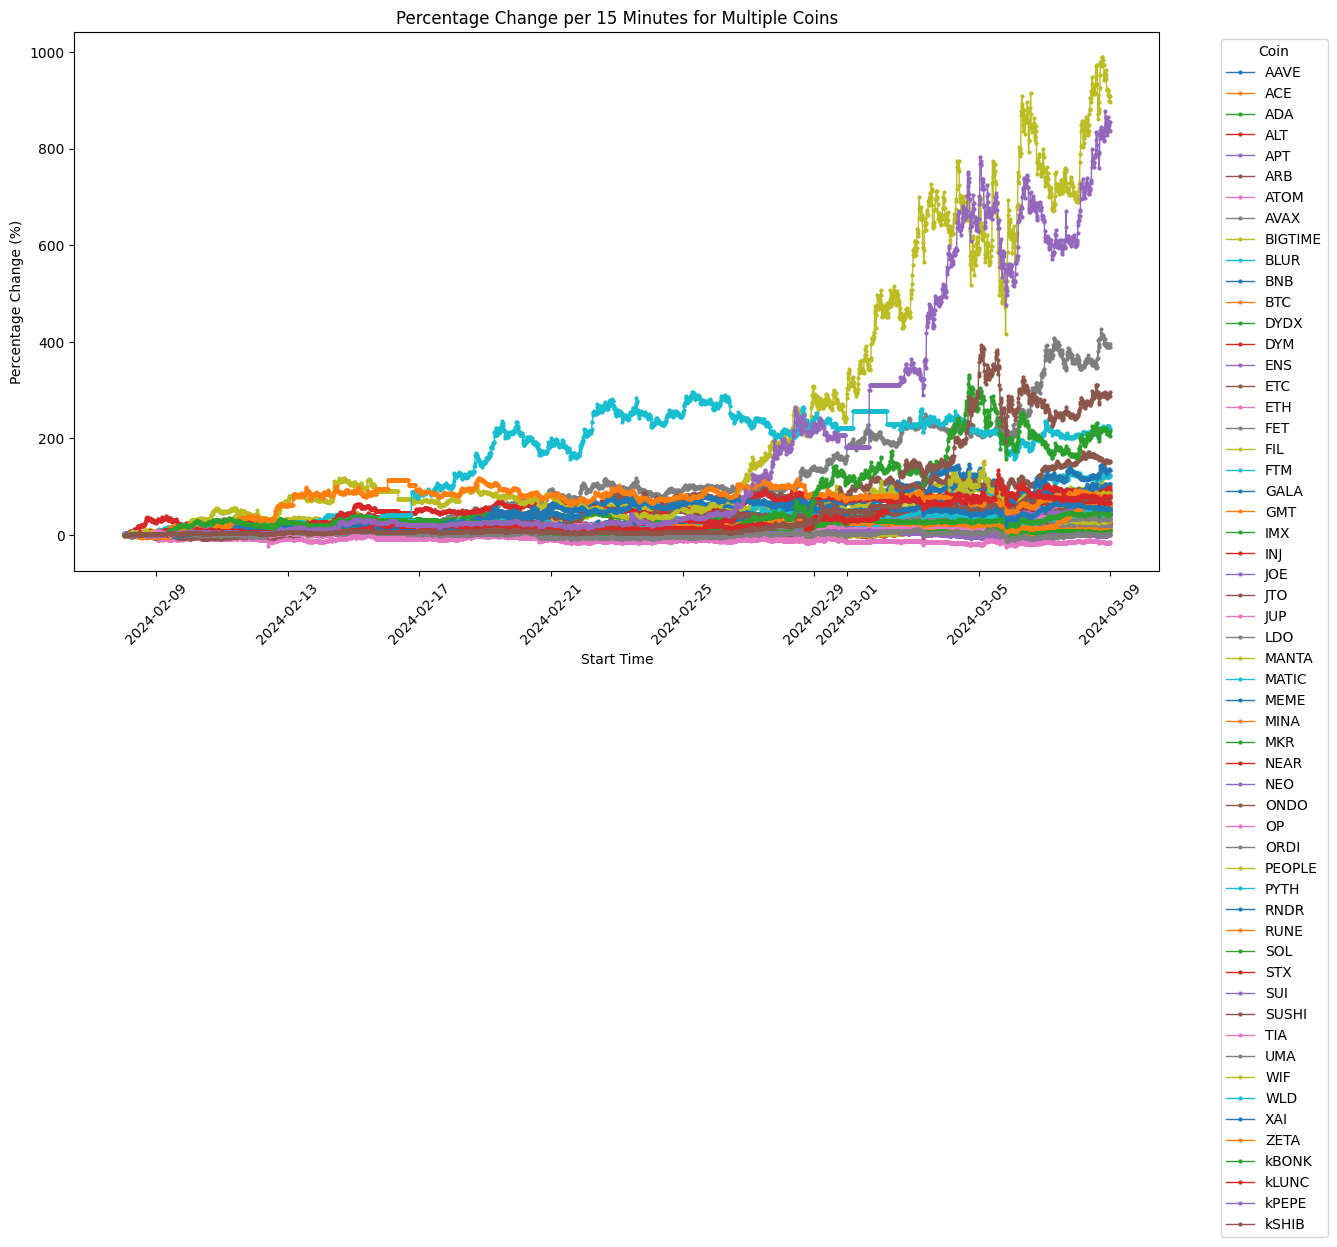

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
# Assuming df is your DataFrame and it includes a 'timestamp' level or column for plotting on the x-axis
# First, ensure your data is sorted by the timestamp if it's not already

def plt1(df):
    chart=100000000

    # Ensure 'start_time' is a datetime column if it's not part of the MultiIndex
    if 'start_time' not in df.index.names:
        df['start_time'] = pd.to_datetime(df['start_time'])

    # If 'start_time' is part of the MultiIndex, you may need to reset the index
    # df.reset_index(inplace=True)
    # df['start_time'] = pd.to_datetime(df['start_time'])

    # Plotting
    plt.figure(figsize=(14, 7))

    # Assuming 'coin' is the first level of the MultiIndex
    for coin, group_df in df.groupby(level=0):
        plt.plot(group_df['start_time'][:chart], group_df['accumulated_pct_change'][:chart], marker='o', linestyle='-', markersize=2, linewidth=1, label=coin)

    plt.title('Percentage Change per 15 Minutes for Multiple Coins')
    plt.xlabel('Start Time')
    plt.ylabel('Percentage Change (%)')
    plt.legend(title='Coin', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plt1(df)

In [8]:
_df = df

_df.groupby(level=0)['accumulated_pct_change'].describe()
# _df['abs_pct_change'] = _df['pct_change'].abs()
_df.groupby(level=0)['accumulated_pct_change'].max().sort_values(ascending=False)



symbol
WIF        990.266876
kPEPE      877.512953
FET        427.046168
kSHIB      393.878226
kBONK      332.171401
WLD        296.387075
ONDO       172.187474
PEOPLE     153.977800
MEME       147.804511
RNDR       144.964102
kLUNC      133.836746
FTM        130.831368
FIL        127.319200
ZETA       117.687716
GALA       113.028108
NEAR       107.646084
STX         99.964493
SUSHI       86.270788
XAI         81.799467
ALT         80.624515
BIGTIME     79.289011
RUNE        73.801583
PYTH        67.249000
JTO         65.906753
ORDI        65.888068
ACE         65.833017
NEO         65.641874
APT         65.136572
ETH         64.921250
AAVE        62.779912
BNB         58.760476
ADA         58.184199
DYDX        57.661121
BTC         57.156701
ETC         56.194602
IMX         54.391503
SOL         49.837294
ATOM        49.499834
DYM         48.832076
OP          45.083460
GMT         43.713620
ENS         42.799150
JUP         41.006178
MATIC       40.678594
INJ         37.130981
BLU

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161336 entries, SOL to DYM
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   start_time              161336 non-null  datetime64[ns]
 1   end_time                161336 non-null  object        
 2   interval                161336 non-null  object        
 3   number_of_trades        161336 non-null  int64         
 4   close                   161336 non-null  float64       
 5   high                    161336 non-null  float64       
 6   low                     161336 non-null  float64       
 7   open                    161336 non-null  float64       
 8   volume                  161336 non-null  float64       
 9   tic                     161336 non-null  int64         
 10  toc                     161336 non-null  int64         
 11  pct_change              161280 non-null  float64       
 12  accumulated_pct_change  161280 non-n

In [13]:
import numpy as np

# Convert 'start_time' to datetime if it's not already
df['start_time'] = pd.to_datetime(df['start_time'])

# Assuming 'pct_change' is calculated and available
# Convert to multipliers
df['multiplier'] = 1 + (df['pct_change'] / 100)

# Since your data is indexed by 'coin' and 'symbol', we'll group by those levels
# Calculate the number of intervals for 7 days: 7 days * 24 hours/day * 4 intervals/hour = 672 intervals
window_size = 7 * 24 * 4  # Adjust this based on your exact data frequency

# Assuming df is your DataFrame and 'multiplier' has already been calculated
# First, calculate the rolling product on each group and store it temporarily
df['rolling_accumulated_multiplier'] = df.groupby(level=0)['multiplier'].transform(
    lambda x: x.rolling(window=window_size, min_periods=1).apply(np.prod)
)

# Calculate the rolling accumulated percentage change from the multiplier
df['rolling_accumulated_pct_change'] = (df['rolling_accumulated_multiplier'] - 1) * 100

# Ensure that rolling_products is aligned with df’s indexing before assigning it back to df.

# Drop temporary columns if necessary
df.drop(columns=['multiplier', 'rolling_accumulated_multiplier'], inplace=True)

In [14]:
df.head()

,start_time,end_time,interval,number_of_trades,close,high,low,open,volume,tic,toc,pct_change,accumulated_pct_change,rolling_accumulated_pct_change
symbol,,,,,,,,,,,,,,
SOL,2024-02-08 00:00:00,2024-02-08-00:14:59,15m,17,101.41,101.42,100.97,101.19,63.59,1707350400000,1707351299999,NaN,NaN,NaN
SOL,2024-02-08 00:15:00,2024-02-08-00:29:59,15m,22,102.03,102.03,101.40,101.52,33.99,1707351300000,1707352199999,0.611380,0.611380,0.611380
SOL,2024-02-08 00:30:00,2024-02-08-00:44:59,15m,17,101.78,102.19,101.78,102.19,683.71,1707352200000,1707353099999,-0.245026,0.364856,0.364856
SOL,2024-02-08 00:45:00,2024-02-08-00:59:59,15m,13,101.99,101.99,101.53,101.79,30.61,1707353100000,1707353999999,0.206327,0.571936,0.571936
SOL,2024-02-08 01:00:00,2024-02-08-01:14:59,15m,22,101.29,102.00,101.25,102.00,139.06,1707354000000,1707354899999,-0.686342,-0.118332,-0.118332


/var/folders/6w/7b7qhtd56jz545z6zwv6zc800000gn/T/ipykernel_7675/2197069139.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


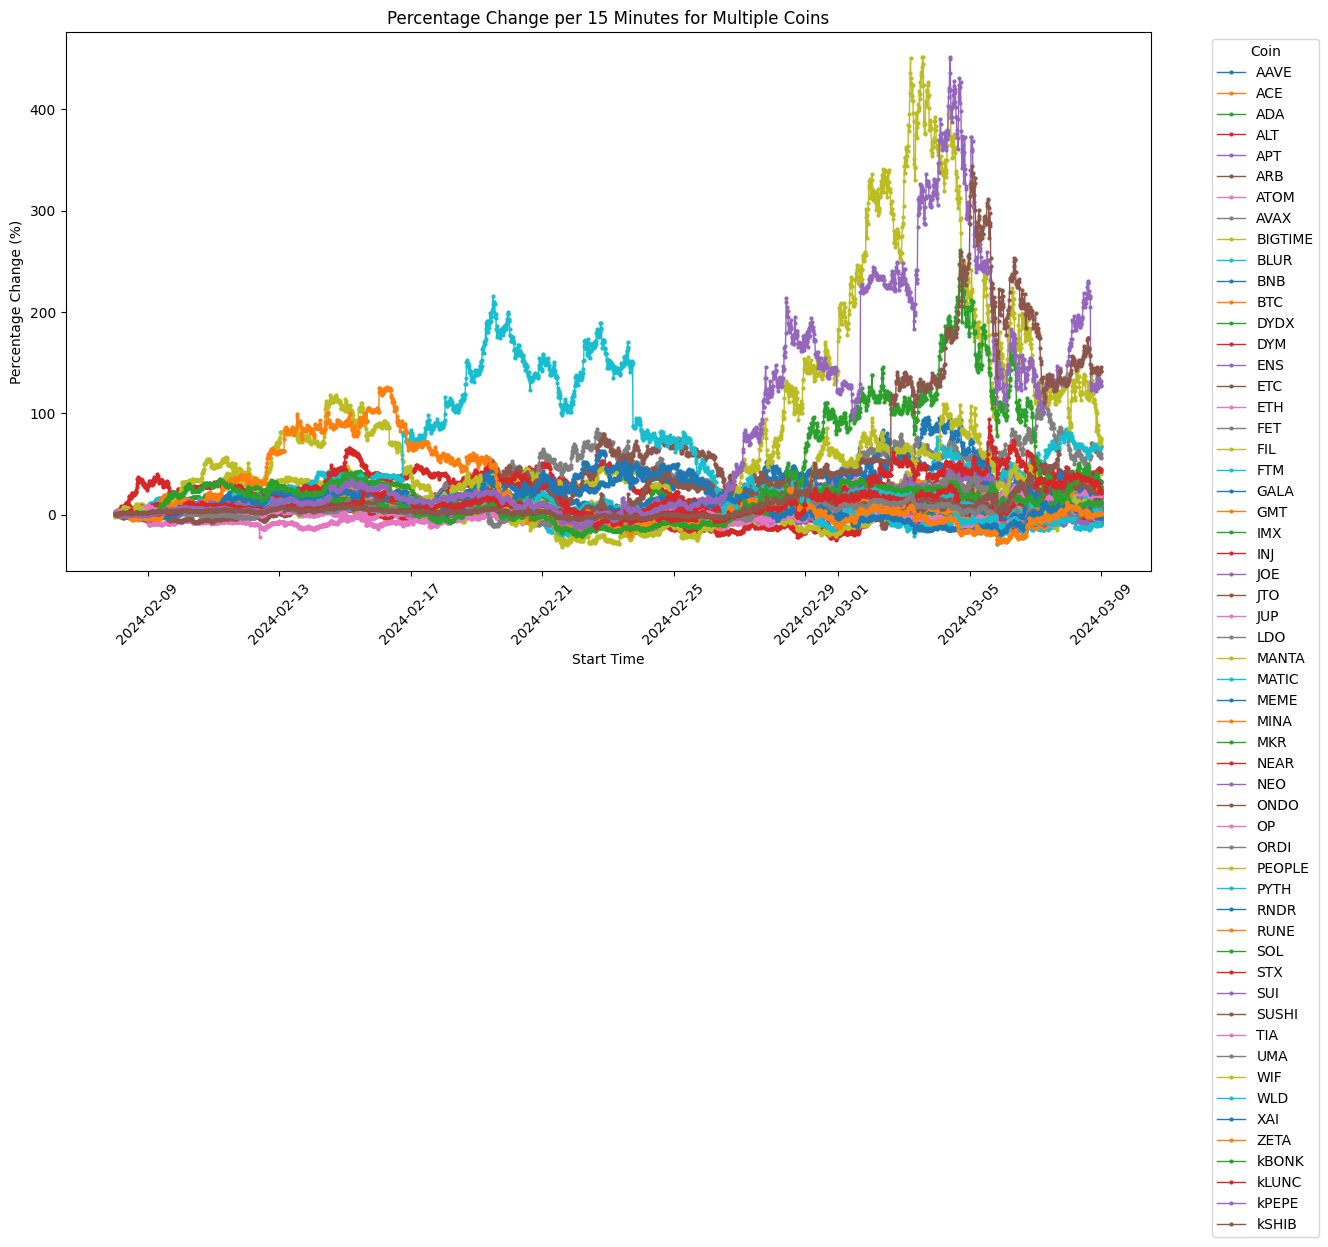

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
# Assuming df is your DataFrame and it includes a 'timestamp' level or column for plotting on the x-axis
# First, ensure your data is sorted by the timestamp if it's not already

def plt2(df):
    chart=100000000

    # Ensure 'start_time' is a datetime column if it's not part of the MultiIndex
    if 'start_time' not in df.index.names:
        df['start_time'] = pd.to_datetime(df['start_time'])

    # If 'start_time' is part of the MultiIndex, you may need to reset the index
    # df.reset_index(inplace=True)
    # df['start_time'] = pd.to_datetime(df['start_time'])

    # Plotting
    plt.figure(figsize=(14, 7))

    # Assuming 'coin' is the first level of the MultiIndex
    for coin, group_df in df.groupby(level=0):
        plt.plot(group_df['start_time'][:chart], group_df['rolling_accumulated_pct_change'][:chart], marker='o', linestyle='-', markersize=2, linewidth=1, label=coin)

    plt.title('Percentage Change per 15 Minutes for Multiple Coins')
    plt.xlabel('Start Time')
    plt.ylabel('Percentage Change (%)')
    plt.legend(title='Coin', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plt2(df)

,multiplier
symbol,
AAVE,NaN
AAVE,1.003473
AAVE,1.009216
AAVE,1.009561
AAVE,1.006505
...,...
kSHIB,1.011555
kSHIB,1.017227
kSHIB,1.011957
